## Data Analysis for BiliDash

This notebook serves the premilinary data analysis and probing (description phase) of the bilidash data.

### Time Series Data of UUPERS Account on bilibili.com

I have been tracking the data for info about number of fans, number of view, coins etc.

#### Correlation between Video Views and Fans

There will definitely be conversion from views of video to number of fans. With the time series data, I can find out the correlation.

The first idea is that the slope of views and the slope of fans must be related.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from pathlib import Path

In [14]:
%%bash
ls data

21768006.csv
22755224.csv
uupers.csv


In [15]:
# path = "data/"
# path = "http://dynamic.imresear.ch/server/track-data/uupers/"
path = Path("data")
uupers = "uupers.csv"
vids = ["21768006.csv", "22755224.csv"]

In [16]:
df_uupers = pd.read_csv( path / uupers)
df_vid1 = pd.read_csv(path / vids[0])
df_vid2 = pd.read_csv(path / vids[1])

In [17]:
def str2dt(str):
    """
    converts string to datetime object
    """
    
    temp_dt = [int(i) for i in ('2018-5-5-1-48-9').split('-')]
    return datetime.datetime( temp_dt[0], temp_dt[1], temp_dt[2], temp_dt[3], temp_dt[4] )
    
    
df_uupers['dt'] = [ str2dt(i) for i in df_uupers['dt'] ]
df_vid1['dt'] = [ str2dt(i) for i in df_vid1['dt'] ]
df_vid2['dt'] = [ str2dt(i) for i in df_vid2['dt'] ]

In [18]:
df_uupers = df_uupers.set_index('dt').reset_index()
df_vid1 = df_vid1.set_index('dt').reset_index()
df_vid2 = df_vid2.set_index('dt').reset_index()

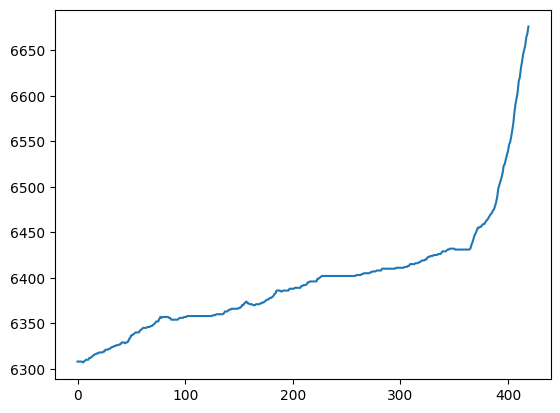

In [19]:
plt.plot(df_uupers[' fans'])

In [20]:
df_vid1.columns

Index(['dt', 'view', 'danmaku', 'reply', 'favorite', 'coin', 'share',
       'now_rank', 'his_rank', 'no_reprint', 'copyright'],
      dtype='object')

In [21]:
total_views = df_vid1['view'].values + df_vid2['view'].values
total_coins = df_vid1['coin'].values + df_vid2['coin'].values

In [22]:
df_vid_tv = pd.DataFrame({"dt": df_vid1['dt'].values,"view":total_views, "coin":total_coins})

In [23]:
df_vid_tv['dt'].head(4)

0   2018-05-05 01:48:00
1   2018-05-05 01:48:00
2   2018-05-05 01:48:00
3   2018-05-05 01:48:00
Name: dt, dtype: datetime64[ns]

In [24]:
df_uupers['dt'].head(4)

0   2018-05-05 01:48:00
1   2018-05-05 01:48:00
2   2018-05-05 01:48:00
3   2018-05-05 01:48:00
Name: dt, dtype: datetime64[ns]

In [25]:
df_uupers.columns

Index(['dt', ' fans'], dtype='object')

In [26]:
df_vid_tv_slope = ( (df_vid_tv['view'].values)[1:] - (df_vid_tv['view'].values)[:-1] )
df_vid_tc_slope = ( (df_vid_tv['coin'].values)[1:] - (df_vid_tv['coin'].values)[:-1] )
df_uupers_slope = ( (df_uupers[' fans'].values)[1:] - (df_uupers[' fans'].values)[:-1] )

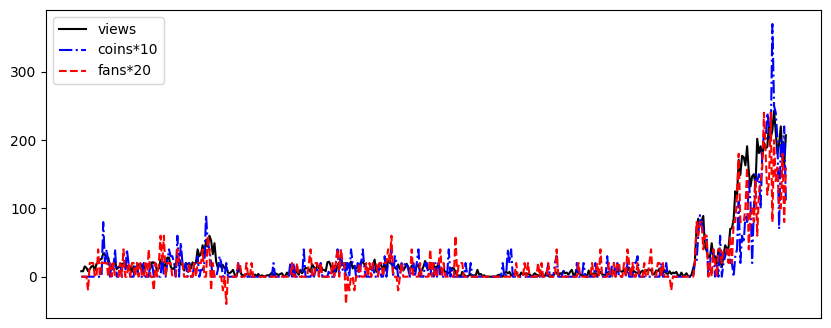

In [27]:
ratio_f = 20
ratio_c = 10

plt.figure(figsize=(10,4))
plt.plot( df_vid_tv_slope, 'k-', label='views' )
plt.plot( df_vid_tc_slope * ratio_c, 'b-.', label='coins'+'*'+str(ratio_c) )
plt.plot( df_uupers_slope *ratio_f, 'r--', label='fans'+'*'+str(ratio_f) )
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.legend()
plt.show()

**Conclusion** for now

1. The conversion rate from views to coin is about 1/10
2. The conversion rate from views to fans is about 1/20

### Cross Correlation of Time Series

The estimations are made by hand. Mathematically, cross correlation tells us about the correlation.

### Missing Videos

In [28]:
missing_vids_path = "/Users/leima/OneDrive - University of New Mexico/data/mybilividdata/failed_vid_data.csv"
missing_vids = np.genfromtxt(missing_vids_path, delimiter=',')


FileNotFoundError: /Users/leima/OneDrive - University of New Mexico/data/mybilividdata/failed_vid_data.csv not found.

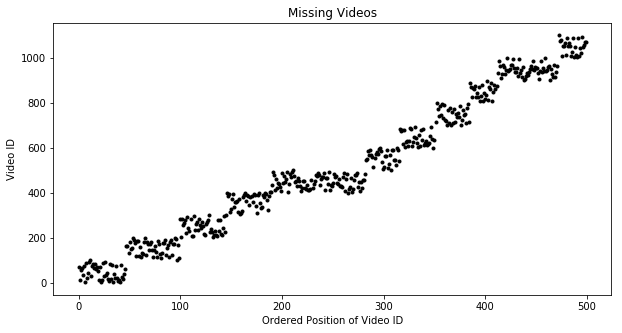

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(missing_vids[:500:],'k.')
plt.title('Missing Videos')
plt.ylabel('Video ID')
plt.xlabel('Ordered Position of Video ID')
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

plt.show()

Calculate missing video rate

In [ ]:
def missing_rate(missing_vids_in, start, win):
    
#     missing_vids_max_f = max(missing_vids)
#     missing_vids_min_f = min( missing_vids_f[start:start+win])
    missing_vids_f = [ i for i in missing_vids_in if (i < start+win)&(i> start) ]


    missing_vids_full_f = [int(i) for i in range(start, start + win)]

#     return len( list( set(missing_vids_full_f) - set(missing_vids_f) ) )/len(missing_vids_full_f)
    return len( missing_vids_f )/win


In [ ]:
windowsize = 100000

missing_rate_list = []

missing_data_start = 0
missing_data_flag = missing_data_start
missing_data_end = max(missing_vids)

for i in np.arange(missing_data_start, missing_data_end - windowsize, windowsize ):
    
    missing_rate_list.append( missing_rate( missing_vids, missing_data_flag, windowsize ) )
    
    missing_data_flag = missing_data_flag + windowsize
    

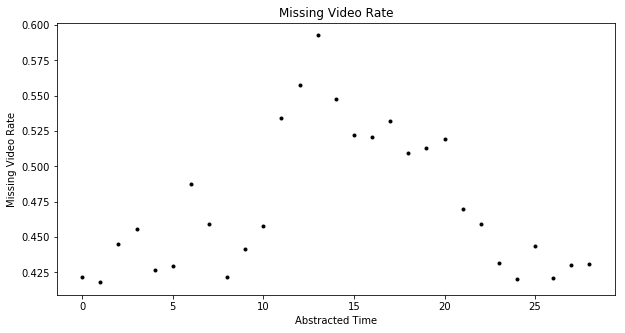

In [ ]:
plt.figure(figsize=(10,5))
plt.plot( missing_rate_list, 'k.' )
plt.title('Missing Video Rate')
plt.ylabel('Missing Video Rate')
plt.xlabel('Abstracted Time')
# plt.ylim([0,1])
plt.show()

The missing video id data rate is about

In [ ]:
np.average(missing_rate_list)

0.4731796551724139

Yet we do not know the reason. It might because the website doesn't use all vids. It might also because the videos are submitted but deleted.